In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()  # Upload your kaggle.json here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [2]:
# Step 2: Download COCO 2017 dataset
!wget -nc http://images.cocodataset.org/zips/train2017.zip
!wget -nc http://images.cocodataset.org/zips/val2017.zip
!wget -nc http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2025-10-30 14:30:25--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.9.180, 52.216.220.49, 3.5.25.23, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.9.180|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  92.9MB/s    in 3m 13s  

2025-10-30 14:33:38 (95.3 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2025-10-30 14:33:39--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.141.180, 16.15.177.205, 54.231.160.121, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.141.180|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  

In [3]:
# Step 3: Unzip files
!unzip -q -n train2017.zip
!unzip -q -n val2017.zip
!unzip -q -n annotations_trainval2017.zip

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from albumentations import Compose, Resize, HorizontalFlip, RandomBrightnessContrast, Normalize
from albumentations.pytorch import ToTensorV2


In [5]:
train_transform = Compose([
    Resize(450, 450),
    HorizontalFlip(p=0.5),
    RandomBrightnessContrast(p=0.2),
    Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
    ToTensorV2()  # Convert to tensor for PyTorch
])


In [6]:
vis_transform = Compose([
    Resize(450, 450),
    HorizontalFlip(p=0.5),
    RandomBrightnessContrast(p=0.2)
])


In [7]:
image_paths = glob('train2017/*.jpg')
print(f"Total images found: {len(image_paths)}")


Total images found: 118287


In [8]:
def denormalize(img):
    mean = np.array([0.485,0.456,0.406])
    std  = np.array([0.229,0.224,0.225])
    img = img * std + mean
    img = np.clip(img, 0, 1)
    return img


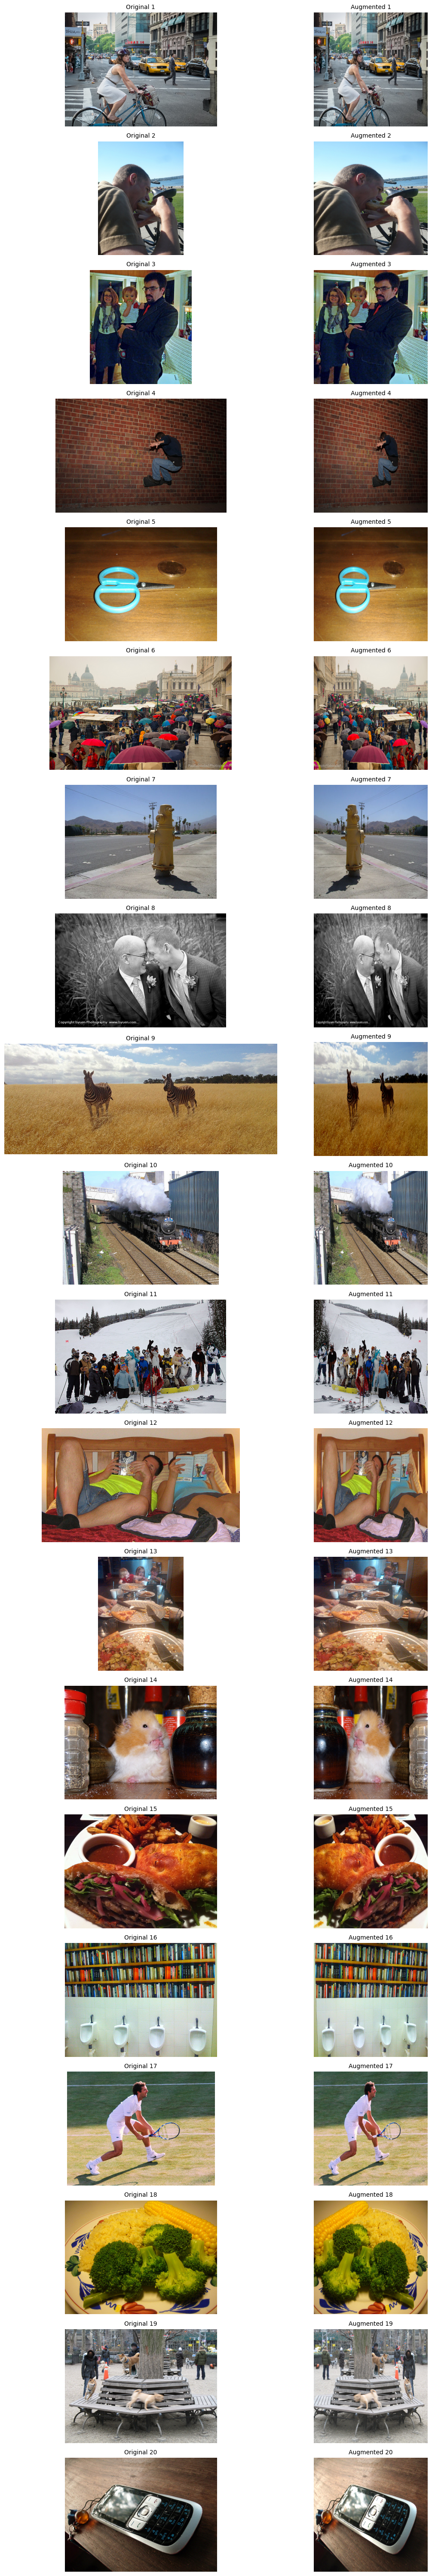

In [9]:
num_images = 20
cols = 2  # original + augmented
rows = num_images

plt.figure(figsize=(12, rows*3))  # adjust figure height for 20 images

for i, img_path in enumerate(image_paths[:num_images]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply visualization pipeline (without Normalize)
    augmented = vis_transform(image=img)['image']

    # Original
    plt.subplot(rows, cols, 2*i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Original {i+1}', fontsize=10)

    # Augmented
    plt.subplot(rows, cols, 2*i + 2)
    plt.imshow(augmented)
    plt.axis('off')
    plt.title(f'Augmented {i+1}', fontsize=10)

plt.tight_layout()
plt.show()
